## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import scipy.stats as stats

In [240]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load Data
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

--2019-09-17 23:23:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-09-17 23:23:04 (127 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [241]:
df = df.replace({'?':0, 'n':-1, 'y':1})
df_sample = df.replace({0:np.NaN, 'n':-1, 'y':1})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']
dem_sample = df_sample_null[df_sample_null['party'] == 'democrat']
rep_sample = df_sample_null[df_sample_null['party'] == 'republican']

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # stderr = stats.sem(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  #print(margin_of_error)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
def confidence_interval_for_issue(dem_data, rep_data, issue_in_question, confidence=.95):
  
  print('This interval is for democrats')
  answer1 = confidence_interval(dem_data[issue_in_question], confidence)
  print(answer1)
  print('This interval is for republicans')
  answer2 = confidence_interval(rep_data[issue_in_question], confidence)
  print(answer2)
  print('\nThe blue line represents democrats in this graph\n The orange line republicans')
  ax = sns.kdeplot(dem_data[issue_in_question], legend=False)
  CI = confidence_interval(dem_data[issue_in_question])
  plt.axvline(x=CI[1], color='#609EC9')
  plt.axvline(x=CI[2], color='#609EC9')
  c = plt.axvline(x=CI[0], color='k');
  
  
  ax2 = sns.kdeplot(rep_data[issue_in_question], legend =False)
  CI2 = confidence_interval(rep_data[issue_in_question])
  plt.axvline(x=CI2[1], color='#FF871E')
  plt.axvline(x=CI2[2], color='#FF871E')
  d = plt.axvline(x=CI2[0], color='k');
  plt.show();
  #sns.kdeplot()
  #plt.legend()
  #plt.legend(ax(0), ax2(0))
  return plt.show()
  #return answer1, answer2

This interval is for democrats
(0.5280898876404494, 0.427726202568374, 0.6284535727125248)
This interval is for republicans
(-0.5, -0.6291173200727946, -0.37088267992720536)

The blue line represents democrats in this graph
 The orange line republicans


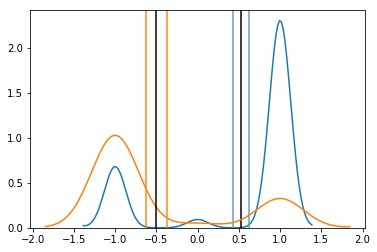

In [287]:
#I took a special interest in a few of the categories I wanted to test based on 
#yesterdays assignment.
#For this reason I decided to get the confidence interval of these 6 specifically.
#They stand out when I asses the attendance of on each issue per party.

confidence_interval_for_issue(dem, rep, 'anti-satellite-ban')

Conclusion:

The information that we get from the confidence interval here show us means from each party that fall evenly on yes and no. Looking at the graph also shows us democrats voting yes with more frequency.

This interval is for democrats
(-0.2883895131086142, -0.40159712742757464, -0.1751818987896538)
This interval is for republicans
(0.9226190476190477, 0.8726203936082828, 0.9726177016298125)

The blue line represents democrats in this graph
 The orange line republicans


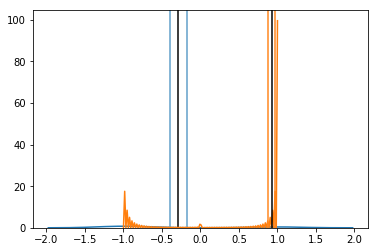

In [299]:
confidence_interval_for_issue(dem, rep, 'crime')

Conclusion:

This graph shows a very strong frequency for republicans voting yes and a very small amount voting no. While democrats where kind of split, with a mean showing us a tendancy towards yes because of a -.28.

This interval is for democrats
(-0.056179775280898875, -0.17580234143603218, 0.06344279087423443)
This interval is for republicans
(0.1130952380952381, -0.03731913888511405, 0.26350961507559023)

The blue line represents democrats in this graph
 The orange line republicans


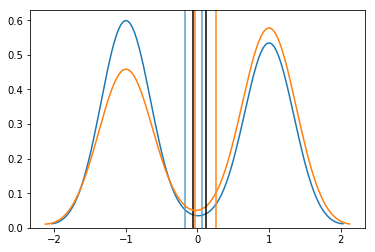

In [290]:
confidence_interval_for_issue(dem, rep, 'immigration')

This graph show us a very even votes between yes and no from both democrats and republicans. The means, however show democrats leaning towards no and republicans leaning towards yes.

This interval is for democrats
(0.6479400749063671, 0.5571818661013366, 0.7386982837113976)
This interval is for republicans
(-0.6488095238095238, -0.7582929423098521, -0.5393261053091956)

The blue line represents democrats in this graph
 The orange line republicans


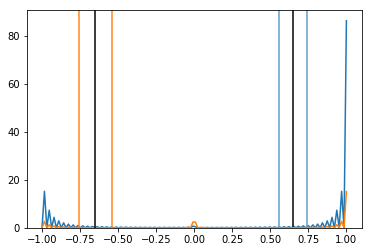

In [291]:
confidence_interval_for_issue(dem, rep, 'aid-to-contras')

This graph show us strong tendancy for republicans and democrats to vote opposite in a similar manner. With republicans having a slightly bigger spread.

This interval is for democrats
(0.003745318352059925, -0.11047087500416793, 0.11796151170828777)
This interval is for republicans
(0.011904761904761904, -0.1314756427140248, 0.15528516652354862)

The blue line represents democrats in this graph
 The orange line republicans


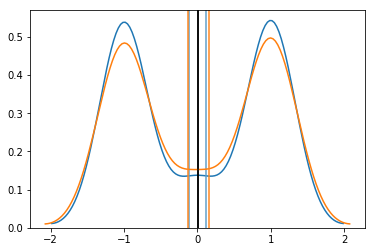

In [292]:
confidence_interval_for_issue(dem, rep, 'water-project')

This graph, mean and erro show us a very similar voting behavior between republicans and democrats. With republicans having a slighty bigger spread.

This interval is for democrats
(0.602996254681648, 0.5337222884470463, 0.6722702209162497)
This interval is for republicans
(0.27380952380952384, 0.1376714673011368, 0.4099475803179109)

The blue line represents democrats in this graph
 The orange line republicans


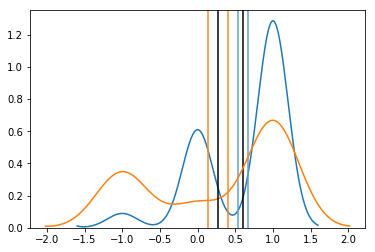

In [293]:
confidence_interval_for_issue(dem, rep, 'south-africa')

This graph and mean show that both parties voted mostly yes with republicans having a greater tendancy towards no.

In [38]:
#I can't seem to be able to run a for loop here unfortunately
#[print(confidence_interval_for_issue(x, y, i)) for x,y,i in dem, rep, df]

SyntaxError: ignored

## CHi Square Test

I wanted to test wheter Republicans and Democrats choose to abstain a vote depending on the issue. The following are different lines I run since yesterday when I noticed this might make a fun experiment and Today I was given the tools to test this with chi square.

I am not sure if the work I did is correct but I would like to point out that the chi squares that I came up with where fairly large.

Finally I test with the scipy and came up with a p value of .63 that represents strong evidence against the null hypothesis, suggesting that republicans and democrats abstain in greater numbers depending on the bill.

In [0]:
lista = dem_sample.isnull().sum()
lista = lista[1:]

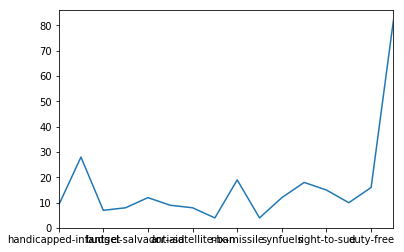

In [309]:
lista.plot()

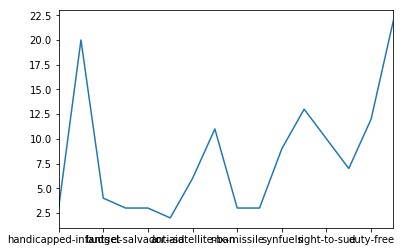

In [308]:
listb = rep_sample.isnull().sum()
listb = listb[1:]
listb.plot()

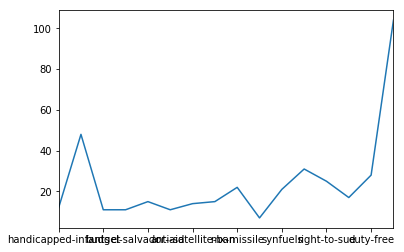

In [316]:
listc = df_sample.isnull().sum()
listc = listc[1:]
listc.plot()

In [341]:
test_dem_chi=(((lista - listc)**2)/listc).sum()
print(f"Chi-Squared: {test_dem_chi}")

Chi-Squared: 50.64040940084584


In [342]:
test_rep_chi=(((listb - listc)**2)/listc).sum()
print(f"Chi-Squared: {test_rep_chi}")

Chi-Squared: 180.64040940084584


In [333]:
observed = pd.crosstab(lista,listb, margins=True)
observed

col_0,2,3,4,6,7,9,10,11,12,13,20,22,All
row_0,,,,,,,,,,,,,
4,0,1,0,0,0,0,0,1,0,0,0,0,2
7,0,0,1,0,0,0,0,0,0,0,0,0,1
8,0,1,0,1,0,0,0,0,0,0,0,0,2
9,1,1,0,0,0,0,0,0,0,0,0,0,2
10,0,0,0,0,1,0,0,0,0,0,0,0,1
12,0,1,0,0,0,1,0,0,0,0,0,0,2
15,0,0,0,0,0,0,1,0,0,0,0,0,1
16,0,0,0,0,0,0,0,0,1,0,0,0,1
18,0,0,0,0,0,0,0,0,0,1,0,0,1


In [335]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 137.6
P-value: 0.6343572527419458
Degrees of Freedom: 144
Expected: 
 [[ 0.125   0.625   0.125   0.125   0.125   0.125   0.125   0.125   0.125
   0.125   0.125   0.125   2.    ]
 [ 0.0625  0.3125  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625
   0.0625  0.0625  0.0625  1.    ]
 [ 0.125   0.625   0.125   0.125   0.125   0.125   0.125   0.125   0.125
   0.125   0.125   0.125   2.    ]
 [ 0.125   0.625   0.125   0.125   0.125   0.125   0.125   0.125   0.125
   0.125   0.125   0.125   2.    ]
 [ 0.0625  0.3125  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625
   0.0625  0.0625  0.0625  1.    ]
 [ 0.125   0.625   0.125   0.125   0.125   0.125   0.125   0.125   0.125
   0.125   0.125   0.125   2.    ]
 [ 0.0625  0.3125  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625
   0.0625  0.0625  0.0625  1.    ]
 [ 0.0625  0.3125  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625
   0.0625  0.0625  0.0625  1.    ]
 [ 0.0625  0.3125  0.0625  0.0625  0.0625  0.0625

In [0]:
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
#categories = ["0-9","10-19","20-29","30-39","40-49","50+"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()

In [322]:
listb.sum()

131

In [320]:
listc.sum()

392

In [0]:
print(df.shape)
print(dem.shape)
print(rep.shape)
dem.shape[0]/rep.shape[0]

(435, 17)
(267, 17)
(168, 17)


1.5892857142857142

In [0]:
((dem_sample.isnull().sum())-(rep_sample.isnull().sum())).sort_values()

aid-to-contras          -7
party                    0
immigration              1
anti-satellite-ban       2
budget                   3
synfuels                 3
crime                    3
duty-free                4
physician-fee-freeze     5
education                5
right-to-sue             5
handicapped-infants      6
religious-groups         7
water-project            8
el-salvador-aid          9
mx-missile              16
south-africa            60
dtype: int64

In [0]:
(((df_sample.isnull().sum())-(dem_sample.isnull().sum())**2)/dem_sample.isnull().sum()).sort_values()

south-africa           -80.731707
water-project          -26.285714
mx-missile             -17.842105
education              -16.277778
duty-free              -14.250000
right-to-sue           -13.333333
el-salvador-aid        -10.750000
synfuels               -10.250000
crime                   -8.300000
religious-groups        -7.777778
handicapped-infants     -7.666667
physician-fee-freeze    -6.625000
anti-satellite-ban      -6.250000
budget                  -5.428571
immigration             -2.250000
aid-to-contras          -0.250000
party                         NaN
dtype: float64

In [310]:
a = (((dem_sample.isnull().sum())-(df_sample_null.isnull().sum())**2)/df_sample_null.isnull().sum())
a = a.sum()
a
print(f"Chi-Squared: {a}")

Chi-Squared: -381.7114891749617


In [311]:
b = (((rep_sample.isnull().sum())-(df_sample_null.isnull().sum())**2)/df_sample_null.isnull().sum())
b = b.sum()
b
print(f"Chi-Squared: {b}")

Chi-Squared: -386.2885108250383


In [312]:
a = (((df_sample.isnull().sum())-(dem_sample.isnull().sum())**2)/dem_sample.isnull().sum())
a = a.sum()
a
print(f"Chi-Squared: {a}")

Chi-Squared: -234.26865385007233


In [313]:
b = (((df_sample.isnull().sum())-(rep_sample.isnull().sum())**2)/rep_sample.isnull().sum())
b = b.sum()
b
print(f"Chi-Squared: {b}")

Chi-Squared: -77.61257076257077


In [314]:
(((df_sample.isnull().sum())-(rep_sample.isnull().sum())**2)/rep_sample.isnull().sum()).sort_values()

water-project          -17.600000
south-africa           -17.272727
education              -10.615385
duty-free               -9.666667
aid-to-contras          -9.636364
right-to-sue            -7.500000
synfuels                -6.666667
crime                   -4.571429
anti-satellite-ban      -3.666667
budget                  -1.250000
immigration             -0.666667
physician-fee-freeze     0.666667
handicapped-infants      1.000000
el-salvador-aid          2.000000
religious-groups         3.500000
mx-missile               4.333333
party                         NaN
dtype: float64

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)